<a href="https://colab.research.google.com/github/4nands/L20251022/blob/main/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 598.9048 - mae: 22.4304 - val_loss: 561.3370 - val_mae: 21.7517
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 495.2621 - mae: 20.4908 - val_loss: 505.8430 - val_mae: 20.4486
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 464.4105 - mae: 19.3654 - val_loss: 441.1308 - val_mae: 18.8169
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 395.5134 - mae: 17.8569 - val_loss: 364.7012 - val_mae: 16.8010
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 303.3169 - mae: 15.2533 - val_loss: 280.6579 - val_mae: 14.3910
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 219.5121 - mae: 12.7324 - val_loss: 198.3182 - val_mae: 11.5212
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 159.5868 - mae: 10.0793 - val_loss: 134.4192 - val_mae: 8.9692
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 88.4072 - mae: 7.2590 - val_loss: 98.7940 - val_mae: 7.6566
Epoch 9/500
11/11 ━━━━━━━━━━━━━━

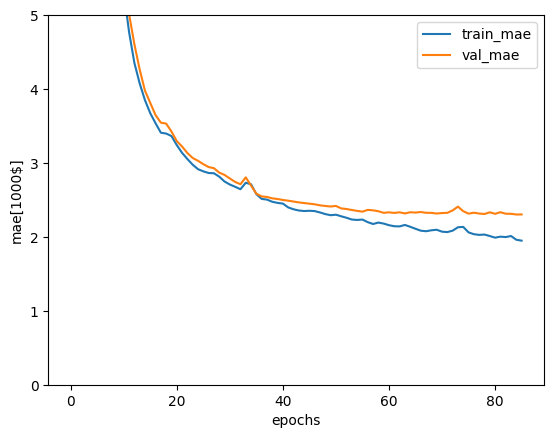

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.0251 - mae: 2.7733 
loss:22.731
mae:2.968
[ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[ 8. 18. 21. 33. 25. 19. 26. 22. 20. 22.]


In [36]:
from keras.datasets import boston_housing
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

import numpy as np
import matplotlib.pyplot as plt


order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data-mean)/ std
test_data = (test_data-mean) / std

model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(13,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss',patience=20)

history = model.fit(train_data,train_labels,epochs=500,validation_split=0.2,callbacks=[early_stop])

plt.plot(history.history['mae'],label='train_mae')
plt.plot(history.history['val_mae'],label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae[1000$]')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

test_loss,test_mae = model.evaluate(test_data,test_labels)
print(f'loss:{test_loss:.3f}\nmae:{test_mae:.3f}')

print(np.round(test_labels[0:10]))
test_predictions = model.predict(test_data[0:10]).flatten()
print(np.round(test_predictions))


In [37]:
import pandas as pd

column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df = pd.DataFrame(train_data,columns=column_names)
print(df.head())
print(train_labels[0:10])

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  1.076246 -0.483615  1.028326 -0.256833  1.559090 -0.468441  0.676891   
1 -0.385120  0.443158 -0.770914 -0.256833 -1.078602  0.636074 -1.845858   
2 -0.363816 -0.483615  2.138151 -0.256833  0.201831 -0.922660  0.952816   
3 -0.394236  2.886469 -1.351551 -0.256833 -1.232254 -0.467030 -1.774189   
4  0.086335 -0.483615  1.028326 -0.256833  1.815177  0.184676  0.680474   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -0.946723  1.675886  1.565287  0.784476 -3.040953  2.936858  
1  2.015204 -0.280929 -0.456756  0.283943  0.414458 -0.853049  
2 -0.977990 -0.856463 -1.311311  0.283943  0.047948  2.003873  
3  3.375957 -0.626249 -0.432684  1.603531  0.226149 -0.989684  
4 -0.602688  1.675886  1.565287  0.784476  0.210404 -0.683290  
[ 8.4 26.2 15.7 20.6 25.  25.1 12.6 22.  22.2 23.3]
